Read the dataset from the below link
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_
Names/US_Baby_Names_right.csv

In [1]:
import pandas as pd
baby_names_df = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')
baby_names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 7 columns):
Unnamed: 0    1016395 non-null int64
Id            1016395 non-null int64
Name          1016395 non-null object
Year          1016395 non-null int64
Gender        1016395 non-null object
State         1016395 non-null object
Count         1016395 non-null int64
dtypes: int64(4), object(3)
memory usage: 54.3+ MB


Task 1.1. Delete unnamed columns

In [2]:
# deletes Unnamed: 0
del baby_names_df['Unnamed: 0']
# unnamed column is removed
baby_names_df.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


2. Show the distribution of male and female

In [3]:
#As described in info total 1016395 records are available in this dataset and without any nonnull values
#Gender with count of Male and Female will be Female (558846)+ Male (457549) = 1016395
#This clearly shows distribution of male and female
baby_names_df['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

3. Show the top 5 most preferred names

In [4]:
#Group by Name and Take Sum with Required Column especially Count
names = baby_names_df.groupby('Name')['Name','Count'].sum()
#Sort the names in descending Order and head will show by default 5 records
names.sort_values("Count",ascending=0).head()

,Count
Name,
Jacob,242874
Emma,214852
Michael,214405
Ethan,209277
Isabella,204798


4. What is the median name occurence in the dataset

In [5]:
#Gives Median Number as 49 for this dataset
names.Count.median()
#finds out the names which has this median occurance 
names[names.Count == names.Count.median()]

,Count
Name,
Aishani,49
Alara,49
Alysse,49
Ameir,49
Anely,49
Antonina,49
Aveline,49
Aziah,49
Baily,49


5. Distribution of male and female born count by states

In [6]:
#Distribution of male and female as well as by states for Group by Gender,Sates
#Sum of Born Count will be distribution factor with male/female and states. 
baby_names_df.groupby(['Gender','State'])['Count'].sum()

Gender  State
F       AK         26250
        AL        215308
        AR        129712
        AZ        368567
        CA       2414063
        CO        260805
        CT        141350
        DC         35276
        DE         31312
        FL        915422
        GA        549637
        HI         37279
        IA        144764
        ID         72808
        IL        695312
        IN        344962
        KS        147216
        KY        210201
        LA        221859
        MA        294236
        MD        269915
        ME         43718
        MI        480990
        MN        276884
        MO        307848
        MS        127343
        MT         31622
        NC        501151
        ND         30054
        NE         88998
                  ...   
M       ME         55650
        MI        557090
        MN        318917
        MO        364924
        MS        160800
        MT         44143
        NC        577529
        ND         39507
        NE 

Task 2: We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.
Task:
1. fitting it to the periodic function
2. plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

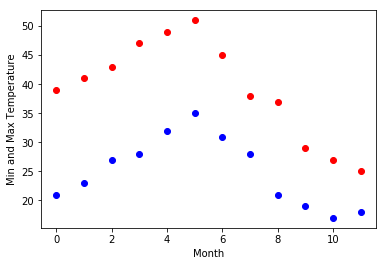

In [10]:
import numpy as np
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
import matplotlib.pyplot as plt
# x-axis has taken as months where are 1-12 by using np.arange(12)
months = np.arange(12)
# x-axis values are array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
# y-axis values can be passed as temp_max and temp_min as mentioned above
# plt.plot(x,y,format) adds plot to the chart 
plt.plot(months, temp_max, 'ro')  #ro stands for red color circles as defined in definition
plt.plot(months, temp_min, 'bo')  #bo stands for blue color circles as defined in definition
plt.xlabel('Month')               #Labeling for x-axis as Month
plt.ylabel('Min and Max Temperature') #Labeling for y-axis as Min and Max Temperature
plt.show()

1. fitting it to the periodic function

In [8]:
from scipy import optimize

#function which returns yearliy temperatures to fit into chart 
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])


2. plot the fit Data Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

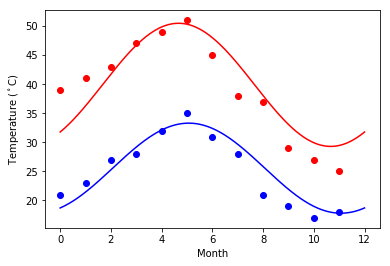

In [9]:
#days gives array of 365 values between 0 to 12 to make plot with line
days = np.linspace(0, 12, num=365)

plt.figure()                                                

plt.plot(months, temp_max, 'ro')                            #Maps Plot with Max Temperature and red color circles
plt.plot(days, yearly_temps(days, *res_max), 'r-')          #Days will be considered as 365 (x-axis max temp) and red line 

plt.plot(months, temp_min, 'bo')                            #Maps Plot with Min Temperature and blue color circles
plt.plot(days, yearly_temps(days, *res_min), 'b-')          #Days will be considered as 365 (x-axis min temp) and red line

plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()